<a href="https://colab.research.google.com/github/TausifAnsari/Traffic-Sign-Recogizer/blob/master/Traffic_SIgn_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

In [0]:
# Install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [0]:
!mkdir dataset
!unzip /content/gtsrb-german-traffic-sign.zip -d /content/dataset

[INFO] loading model...
[INFO] predicting...


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


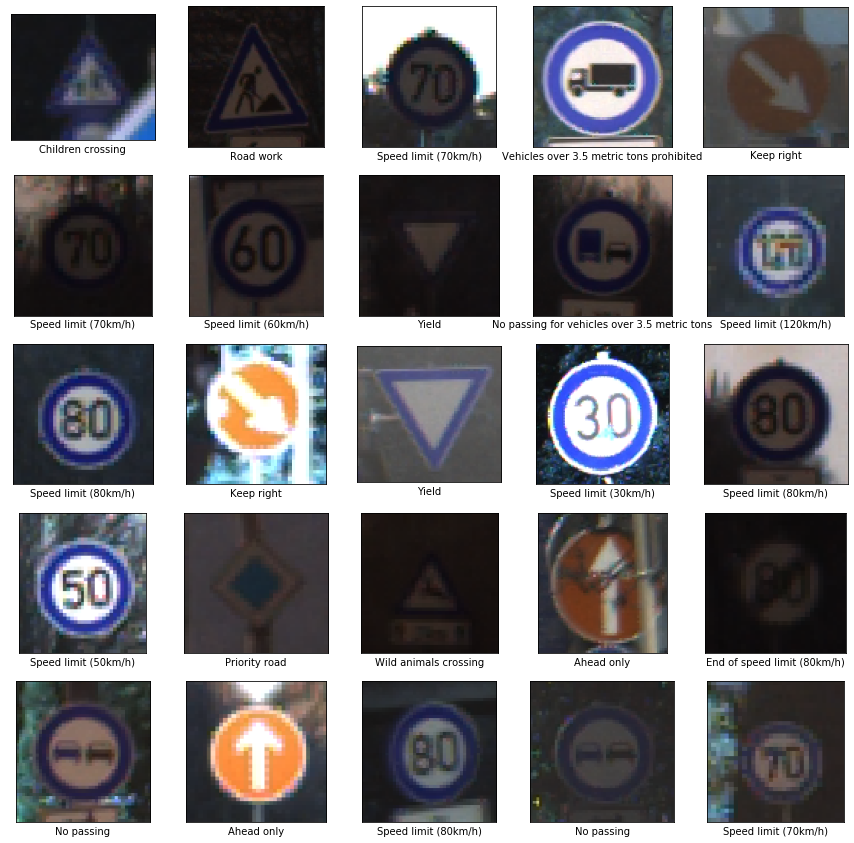

In [11]:
# USAGE
# python predict.py --model output/trafficsignnet.model --images gtsrb-german-traffic-sign/Test --examples examples

# import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from skimage import transform
from skimage import exposure
from skimage import io
from imutils import paths
import numpy as np
import argparse
import imutils
import random
import cv2
import os

# construct the argument parse and parse the arguments
'''ap = argparse.ArgumentParser()
ap.add_argument("-m", "--model", required=True,
	help="path to pre-trained traffic sign recognizer")
ap.add_argument("-i", "--images", required=True,
	help="path to testing directory containing images")
ap.add_argument("-e", "--examples", required=True,
	help="path to output examples directory")
args = vars(ap.parse_args())'''

# load the traffic sign recognizer model
print("[INFO] loading model...")
model = load_model("traffic.h5")

# load the label names
labelNames = open("signnames.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]

# grab the paths to the input images, shuffle them, and grab a sample
print("[INFO] predicting...")
imagePaths = list(paths.list_images("/content/dataset/Test"))
random.shuffle(imagePaths)
imagePaths = imagePaths[:25]

fig = plt.figure(figsize = (15,15))
#fig.suptitle("Prediction",fontsize=16)

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# load the image, resize it to 32x32 pixels, and then apply
	# Contrast Limited Adaptive Histogram Equalization (CLAHE),
	# just like we did during training
	image = io.imread(imagePath)
	image = transform.resize(image, (32, 32))
	image = exposure.equalize_adapthist(image, clip_limit=0.1)

	# preprocess the image by scaling it to the range [0, 1]
	image = image.astype("float32") / 255.0
	image = np.expand_dims(image, axis=0)

	# make predictions using the traffic sign recognizer CNN
	preds = model.predict(image)
	j = preds.argmax(axis=1)[0]
	label = labelNames[j]

	# load the image using OpenCV, resize it, and draw the label
	# on it
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=128)
	'''cv2.putText(image, label, (5, 15), cv2.FONT_HERSHEY_SIMPLEX,
		0.45, (0, 0, 255), 2)
	plt.grid(False)
	plt.xlabel(label)
	plt.title("Sign :"+label)

	# save the image to disk
	p = os.path.sep.join([args["examples"], "{}.png".format(i)])
	cv2.imwrite(p, image)
	plt.imshow(image)
	plt.show()'''
	plt.subplot(5,5,i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	#plt.title("Sign :"+label)
	plt.xlabel(label)
	plt.imshow(image)
plt.show()